## Functions

In [3]:
from typing import List
import json

# converts certain columns to dictionaries (necessary for Description_tags and Resolution_tags)
def convert_to_dict(dataframe: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    for col in columns:
        if type(dataframe.loc[0, col]) == str:
            dataframe[col] = dataframe[col].apply(lambda x: json.loads(x.replace("'", '"')))

    return dataframe

In [4]:
def description_ratios(row: pd.Series) -> dict:
    total = sum(row['Description_tags'].values())
    return {key: value / total for key, value in row['Description_tags'].items()}


def get_description_ratios(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['Description_tags_ratio'] = dataframe.apply(description_ratios, axis=1)

    cols = dataframe.columns.to_list()
    cols.insert(cols.index('Description_tags')+1, cols[-1])
    cols.pop(-1)
    dataframe = dataframe[cols]
    return dataframe

def resolution_ratios(row: pd.Series) -> dict:
    total = sum(row['Resolution_tags'].values())
    return {key: value / total for key, value in row['Resolution_tags'].items()}

def get_response_ratios(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['Resolution_tags_ratio'] = dataframe.apply(resolution_ratios, axis=1)

    cols = dataframe.columns.to_list()
    cols.insert(cols.index('Resolution_tags')+1, cols[-1])
    cols.pop(-1)
    dataframe = dataframe[cols]
    return dataframe

def get_text_ratios(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe = get_description_ratios(dataframe)
    dataframe = get_response_ratios(dataframe)
    return dataframe



In [5]:
def semantic_classes(dataframe: pd.DataFrame) -> pd.DataFrame:
    semantic_classes = ['NOUN', '.', 'VERB', 'ADP', 'ADJ', 'DET', 'PRON', 'ADV', 'PRT', 'CONJ', 'X', 'NUM']
    for cl in semantic_classes:
        dataframe[cl] = incidents.apply(lambda x: x['Description_tags_ratio'][cl] if cl in x['Description_tags_ratio'] else 0, axis=1)
    
    return dataframe


In [18]:
def remove_nan(dataframe: pd.DataFrame, column: str, char='') -> pd.DataFrame:
    dataframe[column] = dataframe[column].replace(np.nan, char, regex=True)
    return dataframe

def get_data() -> pd.DataFrame:
    dataframe = pd.read_csv('Preprocessed_Data_Tags.csv', index_col=0)
    dataframe = remove_nan(dataframe, 'Description')
    dataframe = remove_nan(dataframe, 'Resolution_notes')
    dataframe = convert_to_dict(dataframe, ['Description_tags', 'Resolution_tags'])
    return dataframe 

In [19]:
import textstat

def FK_grade(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['FK_grade_description'] = dataframe.apply(lambda x: textstat.flesch_kincaid_grade(x['Description']), axis=1)
    dataframe['FK_grade_resolution'] = dataframe.apply(lambda x: textstat.flesch_kincaid_grade(x['Resolution_notes']), axis=1)
    return dataframe

def FK_readability(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['FK_readability_description'] = dataframe.apply(lambda x: textstat.flesch_reading_ease(x['Description']), axis=1)
    dataframe['FK_readability_resolution'] = dataframe.apply(lambda x: textstat.flesch_reading_ease(x['Resolution_notes']), axis=1)
    return dataframe

def FK_average(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['Average_FK_description'] = (dataframe['FK_grade_description'] + dataframe['FK_readability_description']) / 2
    dataframe['Average_FK_resolution'] = (dataframe['FK_grade_resolution'] + dataframe['FK_readability_resolution']) / 2
    return dataframe

In [20]:
# !pip install textstat

## Semantic quality

In [21]:
import pandas as pd
import numpy as np

In [22]:
incidents = get_data()
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_tags,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...","{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...","{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...","{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,,{},0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...","{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,,{},0,IMT NLI Ops Orange,,{},0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...","{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,,{},0,7.0,325514.0


In [24]:
incidents.columns

Index(['Number', 'Priority', 'Incident_area', 'Opened', 'Closed', 'Status',
       'Problem', 'Configuration_item', 'Short_description',
       'Short_description_length', 'Description', 'Description_tags',
       'Description_tags_ratio', 'Description_length', 'Assignment_group',
       'Resolution_notes', 'Resolution_tags', 'Resolution_tags_ratio',
       'Resolution_length', 'Reassignment_count', 'Resolve_time'],
      dtype='object')

In [25]:
incidents = get_text_ratios(incidents)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,Description_tags,Resolve_time,Description_tags_ratio,Description_length,Assignment_group,Resolution_notes,Resolution_tags,Reassignment_count,Resolution_tags_ratio,Resolution_length
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,"{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",158300.0,"{'NOUN': 0.45454545454545453, '.': 0.136363636...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",1.0,"{'NOUN': 0.2765957446808511, '.': 0.1276595744...",247
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",5694.0,"{'NOUN': 0.7796610169491526, '.': 0.0847457627...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",0.0,"{'VERB': 0.1111111111111111, 'DET': 0.16666666...",105
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,"{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",126566.0,"{'NOUN': 0.4201954397394137, '.': 0.2866449511...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",1.0,"{'DET': 0.16666666666666666, 'VERB': 0.2222222...",105
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,"{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",1919058.0,"{'PRON': 0.054945054945054944, 'ADV': 0.021978...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",3.0,"{'NOUN': 0.4, 'VERB': 0.6}",31
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",128.0,"{'PRON': 0.15, 'VERB': 0.05, 'ADV': 0.05, 'NOU...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",0.0,"{'NOUN': 0.29411764705882354, 'VERB': 0.176470...",90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",381.0,"{'NOUN': 0.55, 'PRON': 0.1, 'VERB': 0.1, '.': ...",108,IMT Service Desk Colombia,,{},0.0,{},0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,"{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",53.0,"{'NOUN': 0.3125, 'CONJ': 0.020833333333333332,...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",0.0,"{'NOUN': 0.625, 'VERB': 0.125, 'X': 0.125, '.'...",55
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,{},2080.0,{},0,IMT NLI Ops Orange,,{},1.0,{},0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,"{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",325514.0,"{'VERB': 0.2191780821917808, 'DET': 0.12328767...",393,IMT NLI Ops AMER,,{},7.0,{},0


In [26]:
incidents = semantic_classes(incidents)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,VERB,ADP,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.181818,0.000000,0.045455,0.045455,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.016949,0.016949,0.016949,0.050847,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.091205,0.107492,0.048860,0.016287,0.013029,0.013029,0.003257,0.000000,0.000000,0.000000
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.120879,0.054945,0.065934,0.021978,0.054945,0.021978,0.010989,0.087912,0.000000,0.000000
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.050000,0.050000,0.100000,0.000000,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.100000,0.050000,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.062500,0.125000,0.083333,0.020833,0.000000,0.000000,0.000000,0.020833,0.104167,0.000000
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.219178,0.082192,0.068493,0.123288,0.041096,0.068493,0.013699,0.027397,0.000000,0.013699


In [35]:
incidents[['NOUN', 'VERB']]

,NOUN,VERB
0,0.454545,0.181818
1,0.779661,0.016949
2,0.420195,0.091205
3,0.362637,0.120879
4,0.450000,0.050000
...,...,...
117240,0.550000,0.100000
117241,0.312500,0.062500
117242,0.000000,0.000000
117243,0.232877,0.219178


In [27]:
incidents.columns

Index(['Number', 'Priority', 'Incident_area', 'Opened', 'Closed', 'Status',
       'Problem', 'Configuration_item', 'Short_description',
       'Short_description_length', 'Description', 'Description_tags',
       'Resolve_time', 'Description_tags_ratio', 'Description_length',
       'Assignment_group', 'Resolution_notes', 'Resolution_tags',
       'Reassignment_count', 'Resolution_tags_ratio', 'Resolution_length',
       'NOUN', '.', 'VERB', 'ADP', 'ADJ', 'DET', 'PRON', 'ADV', 'PRT', 'CONJ',
       'X', 'NUM'],
      dtype='object')

In [28]:
incidents = FK_grade(incidents)
incidents = FK_readability(incidents)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,PRON,ADV,PRT,CONJ,X,NUM,FK_grade_description,FK_grade_resolution,FK_readability_description,FK_readability_resolution
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000,9.5,18.5,55.24,31.89
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000,40.1,11.1,-121.41,45.76
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.013029,0.013029,0.003257,0.000000,0.000000,0.000000,39.8,9.9,-77.38,54.22
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.054945,0.021978,0.010989,0.087912,0.000000,0.000000,18.3,5.2,-16.04,66.40
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000,8.4,9.1,58.28,56.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,9.6,-15.7,38.99,206.84
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.000000,0.000000,0.000000,0.020833,0.104167,0.000000,18.0,15.5,-9.92,-3.32
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.7,-15.7,206.84,206.84
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.041096,0.068493,0.013699,0.027397,0.000000,0.013699,14.8,-15.7,46.95,206.84


In [36]:
incidents.columns

Index(['Number', 'Priority', 'Incident_area', 'Opened', 'Closed', 'Status',
       'Problem', 'Configuration_item', 'Short_description',
       'Short_description_length', 'Description', 'Description_tags',
       'Resolve_time', 'Description_tags_ratio', 'Description_length',
       'Assignment_group', 'Resolution_notes', 'Resolution_tags',
       'Reassignment_count', 'Resolution_tags_ratio', 'Resolution_length',
       'NOUN', '.', 'VERB', 'ADP', 'ADJ', 'DET', 'PRON', 'ADV', 'PRT', 'CONJ',
       'X', 'NUM', 'FK_grade_description', 'FK_grade_resolution',
       'FK_readability_description', 'FK_readability_resolution'],
      dtype='object')

In [240]:
incidents = FK_average(incidents)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,PRT,CONJ,X,NUM,FK_grade_description,FK_grade_resolution,FK_readability_description,FK_readability_resolution,Average_FK_description,Average_FK_resolution
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.045455,0.000000,0.000000,0.000000,9.5,18.5,55.24,31.89,32.370,25.195
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.033898,0.000000,0.000000,0.000000,40.1,11.1,-121.41,45.76,-40.655,28.430
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.003257,0.000000,0.000000,0.000000,39.8,9.9,-77.38,54.22,-18.790,32.060
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.010989,0.087912,0.000000,0.000000,18.3,5.2,-16.04,66.40,1.130,35.800
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.000000,0.000000,0.000000,0.000000,8.4,9.1,58.28,56.25,33.340,32.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.000000,0.000000,0.000000,0.000000,9.6,-15.7,38.99,206.84,24.295,95.570
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.000000,0.020833,0.104167,0.000000,18.0,15.5,-9.92,-3.32,4.040,6.090
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,-15.7,-15.7,206.84,206.84,95.570,95.570
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.013699,0.027397,0.000000,0.013699,14.8,-15.7,46.95,206.84,30.875,95.570


In [241]:
incidents.to_csv('../data/Preprocessed_Data_Flesch')

In [244]:
incidents.loc[:, incidents.columns[-25:]]

,Assignment_group,Resolution_notes,Resolution_tags,Resolution_tags_ratio,Resolution_length,Reassignment_count,Resolve_time,NOUN,.,VERB,...,PRT,CONJ,X,NUM,FK_grade_description,FK_grade_resolution,FK_readability_description,FK_readability_resolution,Average_FK_description,Average_FK_resolution
0,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...","{'NOUN': 0.2765957446808511, '.': 0.1276595744...",247,1.0,158300.0,0.454545,0.136364,0.181818,...,0.045455,0.000000,0.000000,0.000000,9.5,18.5,55.24,31.89,32.370,25.195
1,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...","{'VERB': 0.1111111111111111, 'DET': 0.16666666...",105,0.0,5694.0,0.779661,0.084746,0.016949,...,0.033898,0.000000,0.000000,0.000000,40.1,11.1,-121.41,45.76,-40.655,28.430
2,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...","{'DET': 0.16666666666666666, 'VERB': 0.2222222...",105,1.0,126566.0,0.420195,0.286645,0.091205,...,0.003257,0.000000,0.000000,0.000000,39.8,9.9,-77.38,54.22,-18.790,32.060
3,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}","{'NOUN': 0.4, 'VERB': 0.6}",31,3.0,1919058.0,0.362637,0.197802,0.120879,...,0.010989,0.087912,0.000000,0.000000,18.3,5.2,-16.04,66.40,1.130,35.800
4,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...","{'NOUN': 0.29411764705882354, 'VERB': 0.176470...",90,0.0,128.0,0.450000,0.150000,0.050000,...,0.000000,0.000000,0.000000,0.000000,8.4,9.1,58.28,56.25,33.340,32.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,IMT Service Desk Colombia,,{},{},0,0.0,381.0,0.550000,0.150000,0.100000,...,0.000000,0.000000,0.000000,0.000000,9.6,-15.7,38.99,206.84,24.295,95.570
117241,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}","{'NOUN': 0.625, 'VERB': 0.125, 'X': 0.125, '.'...",55,0.0,53.0,0.312500,0.270833,0.062500,...,0.000000,0.020833,0.104167,0.000000,18.0,15.5,-9.92,-3.32,4.040,6.090
117242,IMT NLI Ops Orange,,{},{},0,1.0,2080.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-15.7,-15.7,206.84,206.84,95.570,95.570
117243,IMT NLI Ops AMER,,{},{},0,7.0,325514.0,0.232877,0.109589,0.219178,...,0.013699,0.027397,0.000000,0.013699,14.8,-15.7,46.95,206.84,30.875,95.570


In [249]:
incidents[incidents['Description'] != ''].sort_values('FK_readability_description')[['Description', 'FK_readability_description']]

,Description,FK_readability_description
92193,https://hgadsharedlive.bclogin.com/hgadsharedl...,-11130.59
92556,New deployed Servers Cannot join domainGNACSMA...,-7957.06
53820,TABLESPACE_NAME ALLOC_SIZE_GB A...,-7247.11
48932,TABLESPACE_NAME ALLOC_SIZE_GB A...,-7246.09
61676,TABLESPACE_NAME ALLOC_SIZE_GB A...,-7246.09
...,...,...
32288,..,206.84
32285,..,206.84
32282,..,206.84
36303,", , , ,",206.84


In [246]:
incidents.loc[1, 'Description']

'Alert Details: Name....................Enqueue Processing Start Time................ :: UTC End Time.................. :: UTC Managed Object..........P~ABAP Managed Object Type.....Technical System Rating..................Red Category................Exceptions Status..................Open Alert Data     Link to Alert Details           Link to Alert Inbox           Alert Confirmation          Confirm this Alert          Confirm all occurrences of this Alert                   '

# OTHER

<AxesSubplot:>

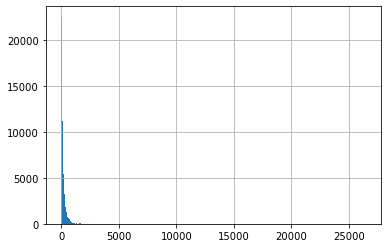

In [47]:
incidents['Description_length'].hist(bins=1000)

In [44]:
incidents['Description_length'].sort_values(ascending=False)

106342    26445
3469      25625
3509      25625
3520      25625
3255      25625
          ...  
47924         0
24876         0
47922         0
102423        0
21079         0
Name: Description_length, Length: 117244, dtype: int64

In [69]:
count, division = np.histogram(incidents['Description_length'], bins=1000)
count, division

(array([22557, 11279,  9851, 11251,  7129,  5896,  6498,  5433,  5063,
         3986,  3287,  3036,  2297,  1841,  1569,  1317,  1083,  1292,
         1084,   805,   714,  1060,  1137,   613,   930,   568,   537,
          660,   317,   719,   349,   359,   211,   250,   323,   139,
          102,    90,    86,    67,    57,    58,    46,    48,    30,
           72,    27,   102,    32,    36,    35,    24,    15,    18,
           27,    15,    10,    21,    31,    33,    39,    59,    49,
           49,    26,    35,    29,    14,    18,    11,     7,     8,
            8,     9,     8,     8,     2,     4,     5,    14,     6,
            2,     2,     4,     8,     4,     3,     9,     6,     5,
            4,     9,     2,     2,     1,     1,     2,     4,     2,
            1,     3,     3,     1,     3,     2,     3,    12,     5,
            3,    14,     2,     2,     3,     5,     1,     3,     2,
            3,     1,     1,     0,     1,     3,     2,     3,     1,
      

In [70]:
count_normalised = count / count[0]

In [71]:
division[10:20]

array([264.45 , 290.895, 317.34 , 343.785, 370.23 , 396.675, 423.12 ,
       449.565, 476.01 , 502.455])

In [72]:
division[0]

0.0

In [79]:
incidents['Description_ratio'] = 0
incidents

<ipython-input-79-2fe5111a760e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['Description_ratio'] = 0


,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference,Description_ratio
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.009615,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143,0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.002088,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374,0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.007177,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985,0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.010545,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538,0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.019417,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.009259,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108,0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.016260,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191,0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.012723,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393,0


In [81]:
i = 5
incidents.loc[(division[i] < incidents['Description_length']) & (incidents['Description_length'] <= division[i + 1])]['Description_ratio'] = count_normalised[i]
incidents

<ipython-input-81-dba343d7259a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents.loc[(division[i] < incidents['Description_length']) & (incidents['Description_length'] <= division[i + 1])]['Description_ratio'] = count_normalised[i]


,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference,Description_ratio
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.009615,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143,0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.002088,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374,0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.007177,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985,0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.010545,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538,0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.019417,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.009259,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108,0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.016260,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191,0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.012723,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393,0


In [77]:
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADP,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.000000,0.009615,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.002088,0.002088,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.015789,0.007177,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.008787,0.010545,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.009709,0.019417,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.009259,0.009259,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.024390,0.016260,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.015267,0.012723,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393


In [84]:
for i in range(len(division) - 1):
    incidents.loc[(division[i] < incidents['Description_length']) & (incidents['Description_length'] <= division[i + 1]), 'Description_ratio'] = count_normalised[i]

be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/alexanderpoppe/opt/anaconda3/envs/ActionLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/alexanderpoppe/opt/anaconda3/envs/ActionLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [85]:
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference,Description_ratio
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.009615,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143,0.498781
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.002088,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374,0.048056
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.007177,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985,0.000621
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.010545,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538,0.046992
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.019417,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13,0.498781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.009259,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108,0.316044
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.016260,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191,0.176708
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.012723,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393,0.069557


In [74]:
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADP,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.000000,0.009615,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.002088,0.002088,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.015789,0.007177,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.008787,0.010545,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.009709,0.019417,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.009259,0.009259,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.024390,0.016260,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.015267,0.012723,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393


In [56]:
incidents['Text_difference'] = incidents['Description_length'] - incidents['Resolution_length']
incidents

<ipython-input-56-1c19a32b7e04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['Text_difference'] = incidents['Description_length'] - incidents['Resolution_length']


,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADP,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.000000,0.009615,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.002088,0.002088,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.015789,0.007177,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.008787,0.010545,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.009709,0.019417,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.009259,0.009259,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.024390,0.016260,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.015267,0.012723,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393


<AxesSubplot:>

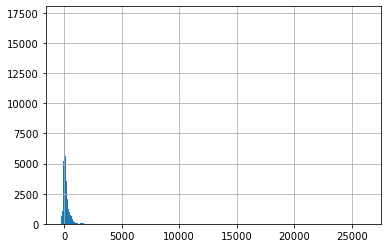

In [58]:
incidents['Text_difference'].hist(bins=1000)

In [59]:
count, division = np.histogram(incidents['Text_difference'], bins=1000)
count, division

(array([  636,   372,   639,  1032,  1592,  1954,  3210,  5216,  9874,
        17177,  9828, 10472,  7081,  5593,  4937,  5070,  4249,  3577,
         2732,  2390,  2053,  1716,  1363,  1187,  1137,  1069,  1003,
          883,   807,   889,   739,   717,   610,   637,   503,   441,
          372,   468,   379,   318,   253,   188,   158,   113,    71,
           79,    70,    58,    45,    42,    43,    40,    33,   105,
           31,    39,    24,    26,    18,    19,    17,    21,    17,
           27,    15,    16,    29,    41,    32,    35,    36,    49,
           39,    26,    34,    19,    14,    14,    12,     8,    10,
            5,     8,     9,     1,     1,     9,     4,     5,     8,
            2,     5,     6,     8,     6,     4,     3,     5,     5,
            1,     7,     4,     2,     1,     2,     5,     0,     3,
            0,     3,     2,     2,     7,     2,     3,     9,     5,
            4,    11,     4,     5,     1,     1,     3,     2,     1,
      

In [60]:
min(incidents['Text_difference'])

-255

<AxesSubplot:>

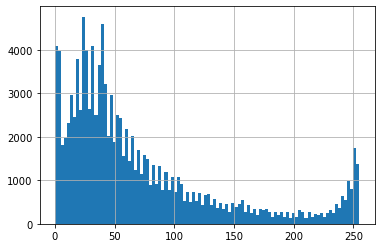

In [94]:
incidents['Resolution_length'].hist(bins=100)

In [95]:
max = max(incidents['Resolution_length'])
incidents['Resolution_ratio'] = incidents['Resolution_length'] / max
incidents

<ipython-input-95-803d88f0f5da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['Resolution_ratio'] = incidents['Resolution_length'] / max


,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,DET,PRON,ADV,PRT,CONJ,X,NUM,Text_difference,Description_ratio,Resolution_ratio
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.009615,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143,0.498781,0.968627
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.006263,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374,0.048056,0.411765
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.002392,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985,0.000621,0.411765
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.003515,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538,0.046992,0.121569
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.000000,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13,0.498781,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108,0.316044,0.000000
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.004065,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191,0.176708,0.215686
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.022901,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393,0.069557,0.000000


In [86]:
count, division = np.histogram(incidents['Resolution_length'], bins=1000)
count, division

(array([3581,    0,    0,  138,    0,    0,    0,  369,    0,    0,    0,
          86,    0,    0,    0, 3240,    0,    0,    0,  645,    0,    0,
           0, 1345,    0,    0,    0,  458,    0,    0,    0,  594,    0,
           0,    0,  942,    0,    0,    0,  437,    0,    0,    0,  508,
           0,    0,    0, 1811,    0,    0,  840,    0,    0,    0, 1084,
           0,    0,    0, 1045,    0,    0,    0, 1208,    0,    0,    0,
        1249,    0,    0,    0, 1111,    0,    0,    0, 1478,    0,    0,
           0, 1207,    0,    0,    0, 1357,    0,    0,    0, 1270,    0,
           0,    0, 1549,    0,    0,    0, 1636,    0,    0,    0, 1576,
           0,    0, 1411,    0,    0,    0, 1308,    0,    0,    0, 1282,
           0,    0,    0, 1421,    0,    0,    0, 1227,    0,    0,    0,
        1346,    0,    0,    0, 1372,    0,    0,    0, 1375,    0,    0,
           0, 1279,    0,    0,    0, 1219,    0,    0,    0, 1175,    0,
           0,    0, 1241,    0,    0, 

In [87]:
count = count / count[0]
count

array([1.        , 0.        , 0.        , 0.03853672, 0.        ,
       0.        , 0.        , 0.10304384, 0.        , 0.        ,
       0.        , 0.02401564, 0.        , 0.        , 0.        ,
       0.9047752 , 0.        , 0.        , 0.        , 0.18011729,
       0.        , 0.        , 0.        , 0.37559341, 0.        ,
       0.        , 0.        , 0.12789724, 0.        , 0.        ,
       0.        , 0.16587545, 0.        , 0.        , 0.        ,
       0.26305501, 0.        , 0.        , 0.        , 0.12203295,
       0.        , 0.        , 0.        , 0.14185982, 0.        ,
       0.        , 0.        , 0.50572466, 0.        , 0.        ,
       0.23457135, 0.        , 0.        , 0.        , 0.30270874,
       0.        , 0.        , 0.        , 0.29181793, 0.        ,
       0.        , 0.        , 0.33733594, 0.        , 0.        ,
       0.        , 0.34878526, 0.        , 0.        , 0.        ,
       0.31024853, 0.        , 0.        , 0.        , 0.41273

In [88]:
for i in range(len(division) - 1):
    incidents.loc[(division[i] < incidents['Resolution_length']) & (incidents['Resolution_length'] <= division[i + 1]), 'Resolution_ratio'] = count_normalised[i]

be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/alexanderpoppe/opt/anaconda3/envs/ActionLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/alexanderpoppe/opt/anaconda3/envs/ActionLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [91]:
incidents[['Resolution_notes', 'Resolution_length', 'Resolution_ratio']]

,Resolution_notes,Resolution_length,Resolution_ratio
0,"Hello Daniel,Many thanks for your reply, at ti...",247,0.000665
1,Monitoring the lock entries in P via incident ...,105,0.000000
2,There was a planned maintenance onsite that wa...,105,0.000000
3,User confirmed issue was solved,31,0.000044
4,"User G drive was inactive, i reconfigured it, ...",90,0.000000
...,...,...,...
117240,NaN,0,NaN
117241,se actualizaron los drivers de impresoras soli...,55,0.000000
117242,NaN,0,NaN
117243,NaN,0,NaN


In [96]:
incidents['VERB_NOUN'] = incidents['VERB'] * incidents['NOUN']

<ipython-input-96-8a4b17ac2280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['VERB_NOUN'] = incidents['VERB'] * incidents['NOUN']


In [97]:
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,PRON,ADV,PRT,CONJ,X,NUM,Text_difference,Description_ratio,Resolution_ratio,VERB_NOUN
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.009615,0.009615,0.009615,0.000000,0.000000,0.000000,-143,0.498781,0.968627,0.003698
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.000000,0.000000,0.004175,0.000000,0.000000,0.000000,374,0.048056,0.411765,0.000200
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.001914,0.001914,0.000478,0.000000,0.000000,0.000000,1985,0.000621,0.411765,0.000827
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.008787,0.003515,0.001757,0.014060,0.000000,0.000000,538,0.046992,0.121569,0.001121
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.029126,0.009709,0.000000,0.000000,0.000000,0.000000,13,0.498781,0.352941,0.000848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,108,0.316044,0.000000,0.001886
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.000000,0.000000,0.000000,0.004065,0.020325,0.000000,191,0.176708,0.215686,0.000744
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.007634,0.012723,0.002545,0.005089,0.000000,0.002545,393,0.069557,0.000000,0.001761


In [102]:
incidents.sort_values('VERB_NOUN')[['Description', 'Resolution_notes', 'Reassignment_count', 'Resolve_time', 'VERB_NOUN']]

,Description,Resolution_notes,Reassignment_count,Resolve_time,VERB_NOUN
19429,NaN,reset,0.0,36.0,0.000000
61437,NaN,"Hello Razi,The auto GR for line was cancelled...",0.0,19229.0,0.000000
24247,NaN,Advised User to change her password.Issue solved.,0.0,544.0,0.000000
61441,NaN,tested with Sophie.It works well.DONE,0.0,43.0,0.000000
24245,NaN,sd,0.0,22.0,0.000000
...,...,...,...,...,...
56663,L drive is missing,"GPUPDATE / FORCE executed, drives re mapped",0.0,2154.0,0.012346
40523,PPTX lost,Done,0.0,30.0,0.012346
97320,SAP BOA is missing,SAP BOA has been installed back.,0.0,184.0,0.012346
53996,puk needed +,puk code has been provided,0.0,171.0,0.013889


## Flesch Kincaid

In [132]:

incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,Description,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,"Please, the transaction VF is not working, we ...","{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,Alert Details: Name....................Enqueue...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,"Dear Team,We received a ticket from our monito...","{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,"I already got access for ESKER QA, UAT & PRD. ...","{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,I cannot access my google drive shortcut from ...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,Could you help me reviewing telephone connecti...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,,{},0,0.0,381.0
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,">> Full details from ""Requested by"" :impresora...","{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,,{},0,IMT NLI Ops Orange,,{},0,1.0,2080.0
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,"Investigating some issues at the site, William...","{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,,{},0,7.0,325514.0


In [133]:
import textstat
test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension."
)
textstat.flesch_reading_ease(test_data)

52.23

In [134]:
sentences = incidents['Description'].values[:5]

In [135]:
for sentence in sentences:
    print(sentence)
    print(textstat.flesch_kincaid_grade(sentence))
    print(textstat.flesch_reading_ease(sentence))

Please, the transaction VF is not working, we have  sales orders to finish[Portal search term: procwork]
9.5
55.24
Alert Details: Name....................Enqueue Processing Start Time................ :: UTC End Time.................. :: UTC Managed Object..........P~ABAP Managed Object Type.....Technical System Rating..................Red Category................Exceptions Status..................Open Alert Data     Link to Alert Details           Link to Alert Inbox           Alert Confirmation          Confirm this Alert          Confirm all occurrences of this Alert                   
40.1
-121.41
Dear Team,We received a ticket from our monitoring tool regarding the issue on your site, below please find incident description. EventID: ccad-d-a-ba-fccabacEventSender: ATF-SCOM-EventType: AVAILABILITYEventSenderType: ATF-SCOM-EventClass: Server does not communicate with ATF SCOMEventSeverity: ErrorHostname: GOYCSMDC.ds.givaudan.comMessage: No monitoring available! Server GOYCSMDC.ds.giv

In [227]:
import textstat

def FK_grade(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['FK_grade_description'] = dataframe.apply(lambda x: textstat.flesch_kincaid_grade(x['Description']), axis=1)
    dataframe['FK_grade_resolution'] = dataframe.apply(lambda x: textstat.flesch_kincaid_grade(x['Resolution_notes']), axis=1)
    return dataframe

def FK_readability(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['FK_readability_description'] = dataframe.apply(lambda x: textstat.flesch_reading_ease(x['Description']), axis=1)
    dataframe['FK_readability_resolution'] = dataframe.apply(lambda x: textstat.flesch_reading_ease(x['Resolution_notes']), axis=1)
    return dataframe

def FK_average(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['Average_FK_description'] = (dataframe['FK_grade_description'] + dataframe['FK_readability_description']) / 2
    dataframe['Average_FK_resolution'] = (dataframe['FK_grade_resolution'] + dataframe['FK_readability_resolution']) / 2
    return dataframe

In [205]:
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,VERB,ADP,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.181818,0.000000,0.045455,0.045455,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.016949,0.016949,0.016949,0.050847,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.091205,0.107492,0.048860,0.016287,0.013029,0.013029,0.003257,0.000000,0.000000,0.000000
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.120879,0.054945,0.065934,0.021978,0.054945,0.021978,0.010989,0.087912,0.000000,0.000000
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.050000,0.050000,0.100000,0.000000,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.100000,0.050000,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.062500,0.125000,0.083333,0.020833,0.000000,0.000000,0.000000,0.020833,0.104167,0.000000
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.219178,0.082192,0.068493,0.123288,0.041096,0.068493,0.013699,0.027397,0.000000,0.013699


In [226]:
incidents = FK_grade(incidents)
incidents = FK_readability(incidents)

incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,FK_grade_description,FK_grade_resolution
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000,9.5,18.5
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.016949,0.050847,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000,40.1,11.1
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.048860,0.016287,0.013029,0.013029,0.003257,0.000000,0.000000,0.000000,39.8,9.9
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.065934,0.021978,0.054945,0.021978,0.010989,0.087912,0.000000,0.000000,18.3,5.2
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.100000,0.000000,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,9.6,-15.7
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.083333,0.020833,0.000000,0.000000,0.000000,0.020833,0.104167,0.000000,18.0,15.5
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.7,-15.7
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.068493,0.123288,0.041096,0.068493,0.013699,0.027397,0.000000,0.013699,14.8,-15.7


In [228]:
incidents = FK_readability(incidents)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,PRON,ADV,PRT,CONJ,X,NUM,FK_grade_description,FK_grade_resolution,FK_readability_description,FK_readability_resolution
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000,9.5,18.5,55.24,31.89
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000,40.1,11.1,-121.41,45.76
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.013029,0.013029,0.003257,0.000000,0.000000,0.000000,39.8,9.9,-77.38,54.22
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.054945,0.021978,0.010989,0.087912,0.000000,0.000000,18.3,5.2,-16.04,66.40
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000,8.4,9.1,58.28,56.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,9.6,-15.7,38.99,206.84
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.000000,0.000000,0.000000,0.020833,0.104167,0.000000,18.0,15.5,-9.92,-3.32
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.7,-15.7,206.84,206.84
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.041096,0.068493,0.013699,0.027397,0.000000,0.013699,14.8,-15.7,46.95,206.84


In [224]:
incidents['FK_grade_description'] = incidents.apply(lambda x: textstat.flesch_kincaid_grade(x['Description']), axis=1)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,ADP,ADJ,DET,PRON,ADV,PRT,CONJ,X,NUM,FK_grade_description
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,0.000000,0.045455,0.045455,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000,9.5
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,0.016949,0.016949,0.050847,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000,40.1
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,0.107492,0.048860,0.016287,0.013029,0.013029,0.003257,0.000000,0.000000,0.000000,39.8
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,0.054945,0.065934,0.021978,0.054945,0.021978,0.010989,0.087912,0.000000,0.000000,18.3
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,0.050000,0.100000,0.000000,0.150000,0.050000,0.000000,0.000000,0.000000,0.000000,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,0.050000,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,9.6
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,0.125000,0.083333,0.020833,0.000000,0.000000,0.000000,0.020833,0.104167,0.000000,18.0
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.7
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,0.082192,0.068493,0.123288,0.041096,0.068493,0.013699,0.027397,0.000000,0.013699,14.8


0         Please, the transaction VF is not working, we ...
1         Alert Details: Name....................Enqueue...
2         Dear Team,We received a ticket from our monito...
3         I already got access for ESKER QA, UAT & PRD. ...
4         I cannot access my google drive shortcut from ...
                                ...                        
117240    Could you help me reviewing telephone connecti...
117241    >> Full details from "Requested by" :impresora...
117242                                                  NaN
117243    Investigating some issues at the site, William...
117244    Hello OBS team,Could you add a rule to block t...
Name: Description, Length: 117244, dtype: object

In [137]:
incidents['FK_readability_description'] = incidents.apply(lambda x: textstat.flesch_reading_ease(x['Description']), axis=1)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,Description_tags,Description_length,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time,FK_grade_description,FK_readability_description
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,"{'NOUN': 10, '.': 3, 'DET': 1, 'VERB': 4, 'ADV...",104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0,9.5,55.24
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,"{'NOUN': 46, '.': 5, 'ADJ': 1, 'VERB': 1, 'PRT...",479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0,40.1,-121.41
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,"{'NOUN': 129, '.': 88, 'PRON': 4, 'VERB': 28, ...",2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0,39.8,-77.38
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,"{'PRON': 5, 'ADV': 2, 'VERB': 11, 'NOUN': 33, ...",569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0,18.3,-16.04
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,"{'PRON': 3, 'VERB': 1, 'ADV': 1, 'NOUN': 9, 'A...",103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0,8.4,58.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,"{'NOUN': 11, 'PRON': 2, 'VERB': 2, '.': 3, 'AD...",108,IMT Service Desk Colombia,,{},0,0.0,381.0,9.6,38.99
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,"{'NOUN': 15, 'CONJ': 1, 'ADP': 6, '.': 13, 'VE...",246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0,18.0,-9.92
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,{},0,IMT NLI Ops Orange,,{},0,1.0,2080.0,-15.7,206.84
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,"{'VERB': 16, 'DET': 9, 'NOUN': 17, 'ADP': 6, '...",393,IMT NLI Ops AMER,,{},0,7.0,325514.0,14.8,46.95


In [138]:
incidents['FK_grade_resolution'] = incidents.apply(lambda x: textstat.flesch_kincaid_grade(x['Resolution_notes']), axis=1)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,Description_length,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time,FK_grade_description,FK_readability_description,FK_grade_resolution
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,104,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0,9.5,55.24,18.5
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,479,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0,40.1,-121.41,11.1
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,2090,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0,39.8,-77.38,9.9
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,569,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0,18.3,-16.04,5.2
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,103,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0,8.4,58.28,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,108,IMT Service Desk Colombia,,{},0,0.0,381.0,9.6,38.99,-15.7
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,246,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0,18.0,-9.92,15.5
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,0,IMT NLI Ops Orange,,{},0,1.0,2080.0,-15.7,206.84,-15.7
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,393,IMT NLI Ops AMER,,{},0,7.0,325514.0,14.8,46.95,-15.7


In [139]:
incidents['FK_readability_resolution'] = incidents.apply(lambda x: textstat.flesch_reading_ease(x['Resolution_notes']), axis=1)
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,Assignment_group,Resolution_notes,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time,FK_grade_description,FK_readability_description,FK_grade_resolution,FK_readability_resolution
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,IMT APS SAP Order to Cash L2,"Hello Daniel,Many thanks for your reply, at ti...","{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0,9.5,55.24,18.5,31.89
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,IMT TCS SAP Basis,Monitoring the lock entries in P via incident ...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0,40.1,-121.41,11.1,45.76
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,IMT NLI Ops EAME,There was a planned maintenance onsite that wa...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0,39.8,-77.38,9.9,54.22
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,IMT Desktop Infra Support Indonesia,User confirmed issue was solved,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0,18.3,-16.04,5.2,66.40
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,IMT Service Desk AME,"User G drive was inactive, i reconfigured it, ...","{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0,8.4,58.28,9.1,56.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,IMT Service Desk Colombia,,{},0,0.0,381.0,9.6,38.99,-15.7,206.84
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,IMT Service Desk Mexico,se actualizaron los drivers de impresoras soli...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0,18.0,-9.92,15.5,-3.32
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,IMT NLI Ops Orange,,{},0,1.0,2080.0,-15.7,206.84,-15.7,206.84
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,IMT NLI Ops AMER,,{},0,7.0,325514.0,14.8,46.95,-15.7,206.84


In [140]:
incidents['FK_grade_average'] = (incidents['FK_grade_description'] + incidents['FK_grade_resolution']) / 2
incidents['FK_readability_average'] = (incidents['FK_readability_description'] + incidents['FK_readability_resolution']) / 2
incidents

,Number,Priority,Incident_area,Opened,Closed,Status,Problem,Configuration_item,Short_description,Short_description_length,...,Resolution_notes_tags,Resolution_length,Reassignment_count,Resolve_time,FK_grade_description,FK_readability_description,FK_grade_resolution,FK_readability_resolution,FK_grade_average,FK_readability_average
0,INC0284448,P2 - High,SAP :: Sonda Procwork (PRW),44013.002951,44024.875023,Closed,NaN,NaN,VF - Not working,16,...,"{'NOUN': 13, '.': 6, 'ADJ': 2, 'ADP': 5, 'PRON...",247,1.0,158300.0,9.5,55.24,18.5,31.89,14.00,43.565
1,INC0284449,P4 - Low,SAP :: Technical,44013.003183,44023.083368,Closed,NaN,SAP-ECC-PRD,Enqueue Processing,19,...,"{'VERB': 2, 'DET': 3, 'NOUN': 8, 'ADP': 3, 'AD...",105,0.0,5694.0,40.1,-121.41,11.1,45.76,25.60,-37.825
2,INC0180368,P2 - High,Infrastructure & Servers :: Server (physical/v...,43831.011447,43842.500012,Closed,NaN,GOYCSM0001DC,GOYCSMDC.ds.givaudan.com (Server does not comm...,151,...,"{'DET': 3, 'VERB': 4, 'ADJ': 2, 'NOUN': 4, 'PR...",105,1.0,126566.0,39.8,-77.38,9.9,54.22,24.85,-11.580
3,INC0180373,P3 - Moderate,SAP :: Order to Cash (OTC),43831.132951,43871.625023,Closed,NaN,NaN,I cant connect to ESKER PRD & UAT,33,...,"{'NOUN': 2, 'VERB': 3}",31,3.0,1919058.0,18.3,-16.04,5.2,66.40,11.75,25.180
4,INC0180380,P3 - Moderate,Business Application :: Google,43831.405255,43841.416678,Closed,NaN,NaN,I cannot access my google drive shortcut from ...,56,...,"{'NOUN': 5, 'VERB': 3, 'ADJ': 1, '.': 2, 'ADV'...",90,0.0,128.0,8.4,58.28,9.1,56.25,8.75,57.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117240,INC0438584,P4 - Low,User Workplace :: Desk Phone,44307.926146,44317.958345,Closed,NaN,NaN,Telephone connectivity,22,...,{},0,0.0,381.0,9.6,38.99,-15.7,206.84,-3.05,122.915
117241,INC0438587,P3 - Moderate,User Workplace :: Printer,44307.933252,44317.958345,Closed,NaN,NaN,actualizacion de drivers,24,...,"{'NOUN': 5, 'VERB': 1, 'X': 1, '.': 1}",55,0.0,53.0,18.0,-9.92,15.5,-3.32,16.75,-6.620
117242,INC0440299,P4 - Low,"Internet, network & remote access :: LAN infra...",44312.497905,44312.521979,Closed,NaN,GKYNYF0001,NaN,0,...,{},0,1.0,2080.0,-15.7,206.84,-15.7,206.84,-15.70,206.840
117243,INC0440766,P4 - Low,"Internet, network & remote access :: OBS",44312.896644,44316.664167,Closed,NaN,GHSNYF0002,Secondary firewall blocking all traffic; zone ...,63,...,{},0,7.0,325514.0,14.8,46.95,-15.7,206.84,-0.45,126.895


In [147]:
incidents.sort_values('FK_readability_average', ascending=False).loc[:, ['Description', 'Resolution_notes', 'FK_readability_average']]

,Description,Resolution_notes,FK_readability_average
1868,,,206.840
21681,,,206.840
26926,,,206.840
65021,,,206.840
81039,,,206.840
...,...,...,...
61956,TABLESPACE_NAME ALLOC_SIZE_GB A...,Issue has been fixed by adding data file to th...,-3869.875
116362,TABLESPACE_NAME ...,Tablespace usage is under Threshold.PSAPSR ...,-3915.560
53820,TABLESPACE_NAME ALLOC_SIZE_GB A...,Added datafiles in both the tablespaces.TABLES...,-3924.360
92556,New deployed Servers Cannot join domainGNACSMA...,After info from David,-3940.590
